## LAB 3 tree-based classification 

### Adult-Income Dataset
[source] https://raw.githubusercontent.com/saravrajavelu/Adult-Income-Analysis/master/adult.csv :
Predict whether income exceeds $50K/yr based on census data

**Attribute information**
1.   age: continuous.
2.   workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.List item
3.  fnlwgt: continuous.
4.  education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5.  education-num: continuous.
6.  marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7.  occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**The outcome (Label)**
15. Income: >50K, <=50K

## อ่านชุดข้อมูล Adult Income

In [67]:
import pandas as pd
df=pd.read_csv('adult_income.csv')

## ข้อ 1 จงวิเคราะห์ข้อมูลด้วย pandas เพื่อตอบคำถามข้อ 1.1 ถึง 1.6

In [68]:
#1.1
a=df.loc[(df['income']=="<=50K")].shape[0]
b=df.loc[(df['income']==">50K")].shape[0]
a

25893

In [69]:
b

8069

In [70]:
#1.2
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [71]:
#1.3 + 1.5
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,33963.000000,3.396300e+04,33963.000000,33963.000000,33963.000000,33963.000000
mean,38.655566,1.898144e+05,10.082502,1066.407532,87.610694,40.403645
std,13.736580,1.055030e+05,2.562423,7429.995915,402.311413,12.381168
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177635e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782510e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.380825e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [72]:
a=df.loc[(df['age']>40) & (df['income']==">50K") & (df['marital-status']=="Never-married") & (df['gender']=="Male")]
a.count()

age                114
workclass          114
fnlwgt             114
education          114
educational-num    114
marital-status     114
occupation         114
relationship       114
race               114
gender             114
capital-gain       114
capital-loss       114
hours-per-week     114
native-country     114
income             114
dtype: int64

In [73]:
a=(df=='?').sum()
a

age                   0
workclass          1951
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1957
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      595
income                0
dtype: int64

## ข้อ 2. เขียนฟังก์ชั่นจัดการ missing values ในชุดข้อมูลนี้

In [74]:
import numpy as np
df=df.replace({'?':np.nan})
a=(df=='?').sum()
a

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [75]:
df=df.fillna(df.mean(numeric_only=True))
df=df.fillna(df.select_dtypes(include='object').mode().iloc[0])
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## ข้อ 3. แปลง categorical features ให้อยู่ในรูปของ binary features 

In [76]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33958,37,Private,126675,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,57,United-States,<=50K
33959,46,Local-gov,175754,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,1876,60,United-States,<=50K
33960,31,Private,121768,Assoc-acdm,12,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,Poland,<=50K
33961,23,Private,180052,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K


In [77]:
df=pd.get_dummies(df)
df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,226802,7,0,0,40,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
1,38,89814,9,0,0,50,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,44,160323,10,7688,0,40,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
4,18,103497,10,0,0,30,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33958,37,126675,10,0,0,57,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
33959,46,175754,14,0,1876,60,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
33960,31,121768,12,0,0,35,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
33961,23,180052,9,0,0,40,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False


## ข้อ 4. แบ่งชุดข้อมูลดังกล่าวออกเป็น  80% และ 20% สำหรับฝึก (train) และทดสอบ (test) 

In [78]:
y=df['income_>50K']
x=df.drop(columns=['income_<=50K','income_>50K'])
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,random_state=42)
xTrain.shape

(27170, 104)

In [79]:
xTest.shape

(6793, 104)

## 5. สร้างโมเดล Decision tree โดยใช้ชุดข้อมูล train กำหนดให้ใช้ entropy เป็น split criterion และความลึกสูงสุดของต้นไม้ไม่เกิน 2 ระดับ (level) 

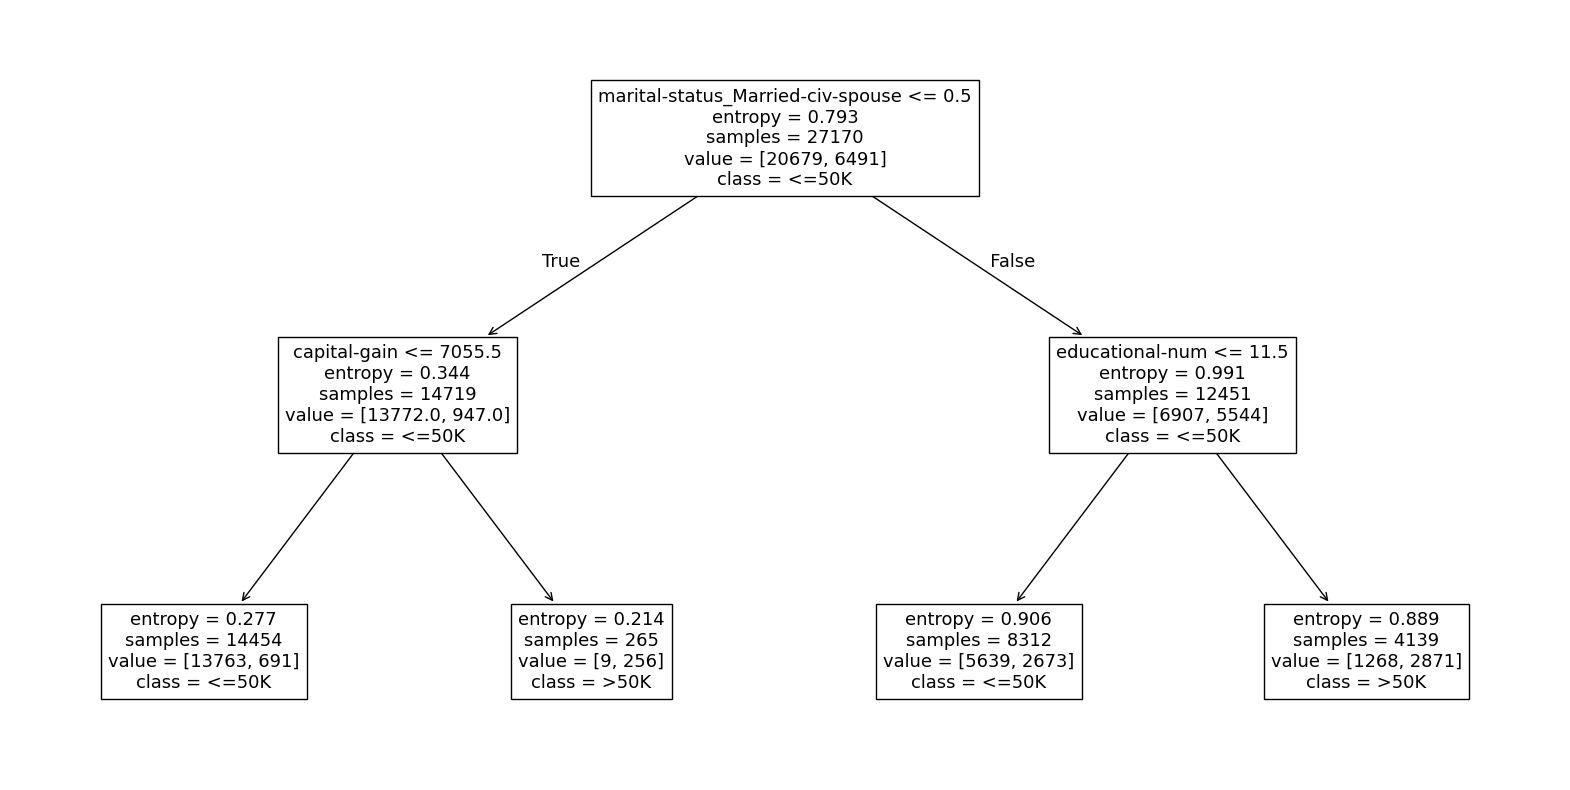

In [80]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
clf=DecisionTreeClassifier(max_depth=2,criterion='entropy')
clf.fit(xTrain,yTrain)
plt.figure(figsize=(20,10))
plot_tree(clf,feature_names=xTrain.columns,class_names=['<=50K', '>50K'])
plt.show()

## ข้อ 6. ความแม่นยำ (accuracy) ของโมเดล decision tree บนชุดข้อมูลทดสอบ 

In [81]:
result=clf.score(xTest,yTest)
print("accuracy: {:.2f}%".format(result*100))

accuracy: 83.34%


### ข้อ 7. สร้างโมเดล random forest โดยกำหนดความลึกสูงสุดของต้นไม้เท่ากับ 3 ขณะที่จำนวนต้นไม้ย่อย (n_estimator) ใช้ GridSearchCV ค้นหาค่าที่ดีที่สุดบนชุดข้อมูล train กำหนดช่วงค่าอยู่ระหว่าง 6 ถึง 10

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

para={'n_estimators': list(range(6,11))}
random=RandomForestClassifier(max_depth=3,criterion='entropy')
clf=GridSearchCV(random,para)
clf.fit(xTrain,yTrain)
clf.best_params_

{'n_estimators': 9}

### 8.	แสดงต้นไม้ random forest ที่สร้างได้ 6 ต้นแรก   

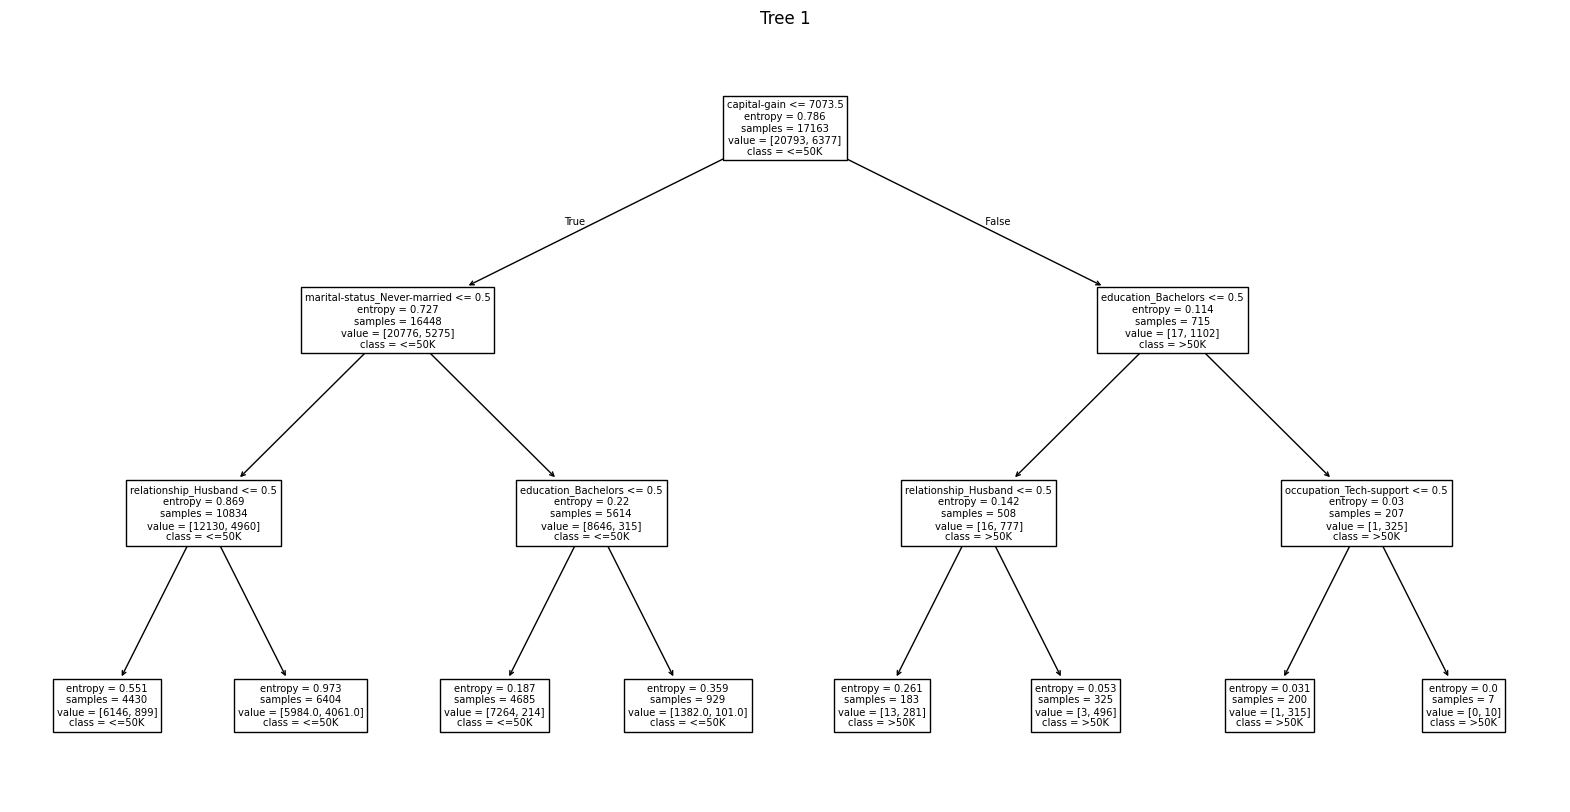

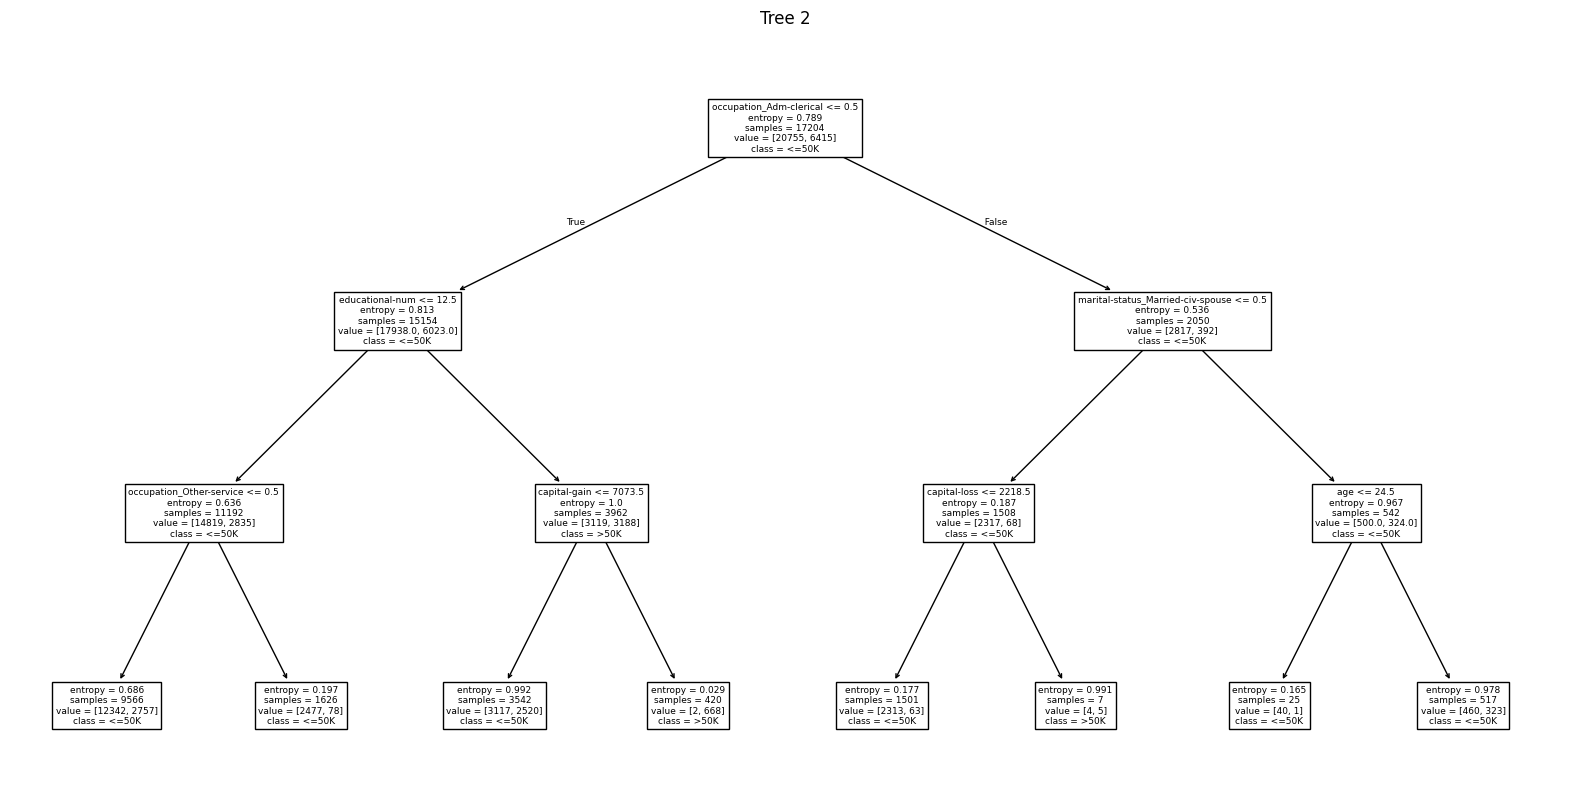

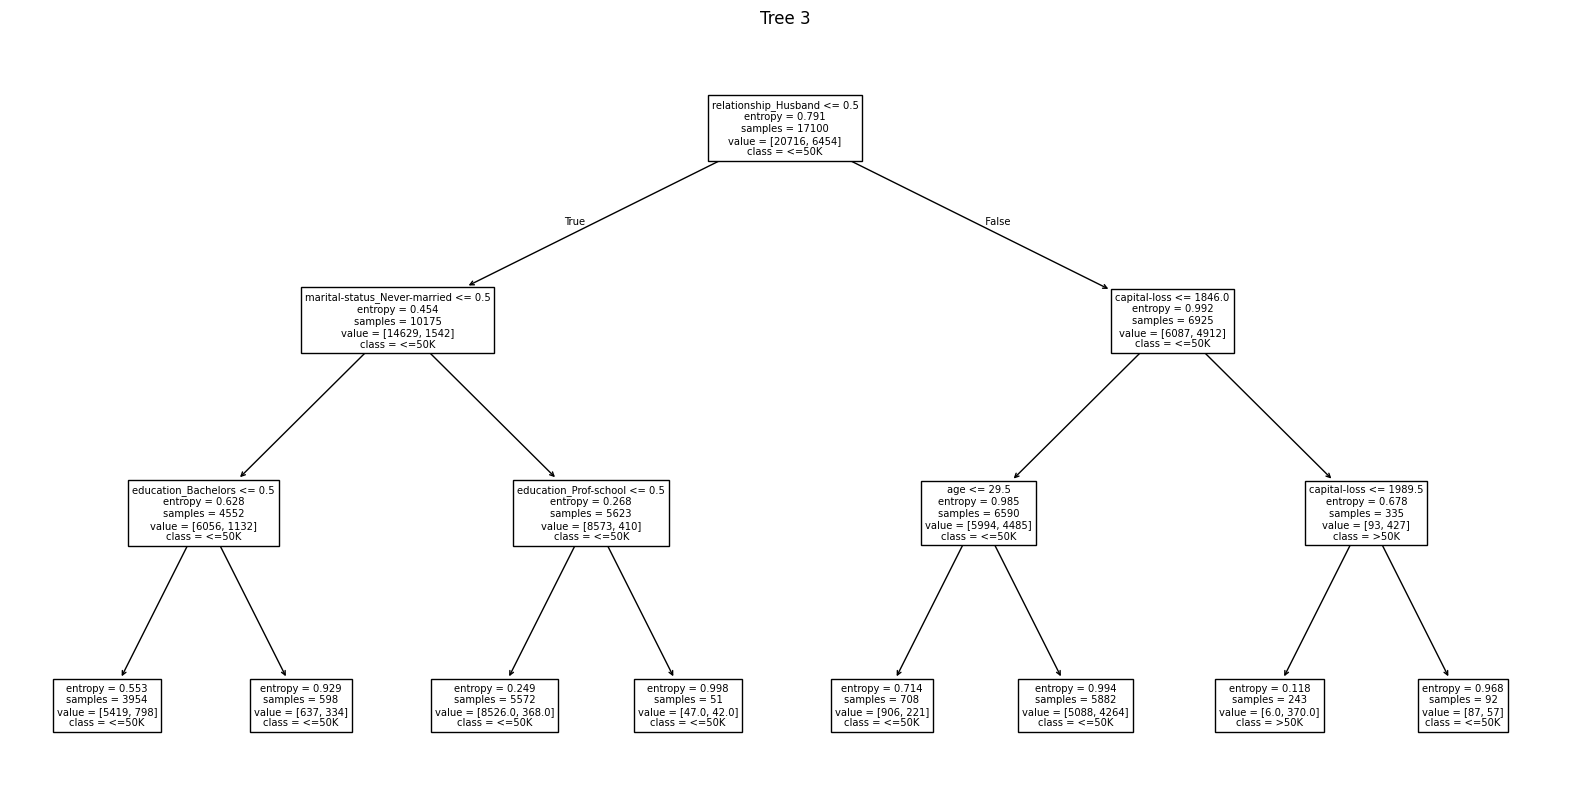

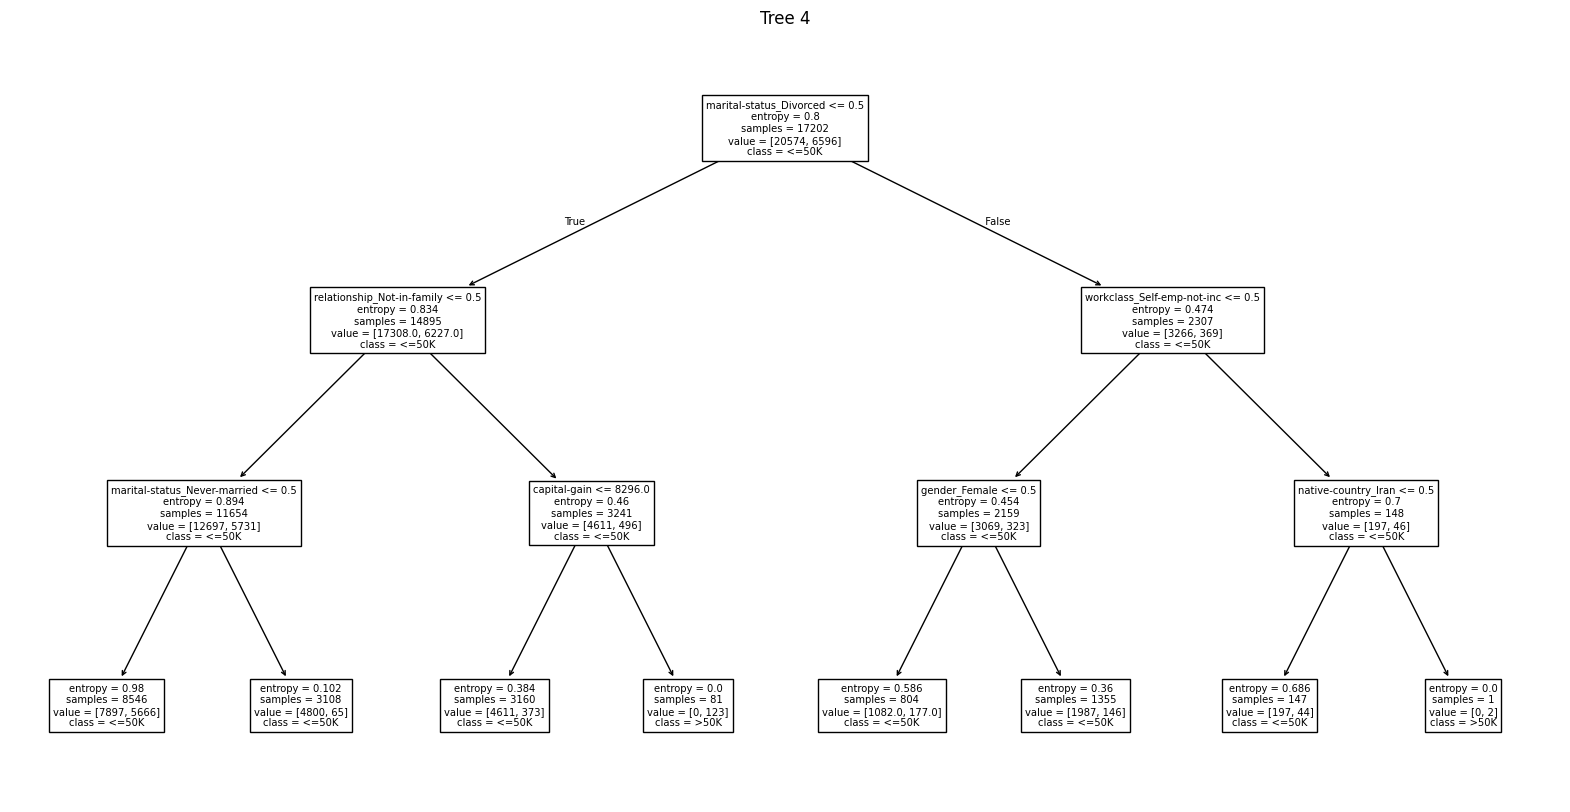

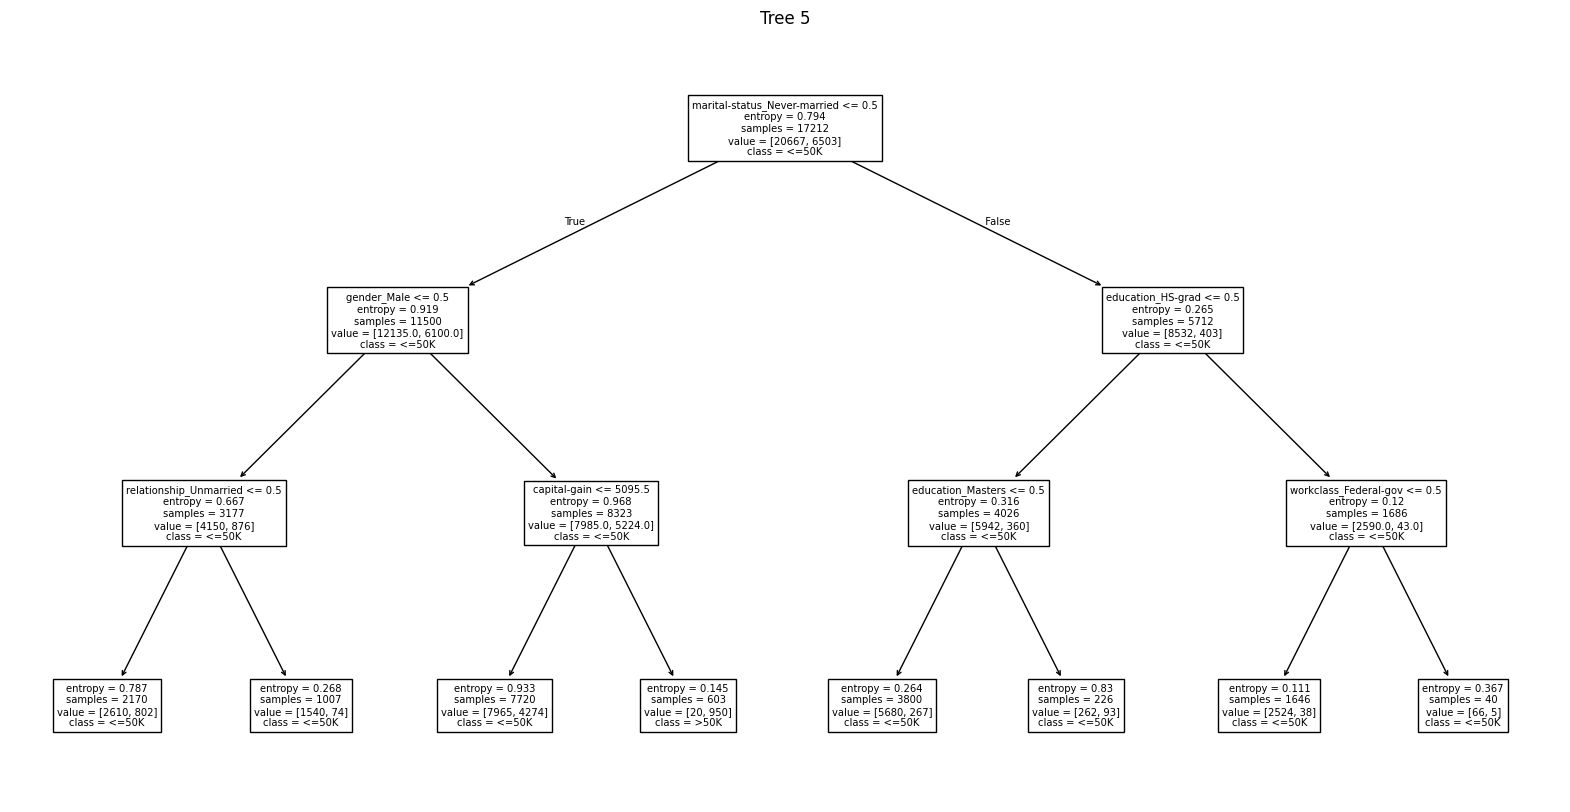

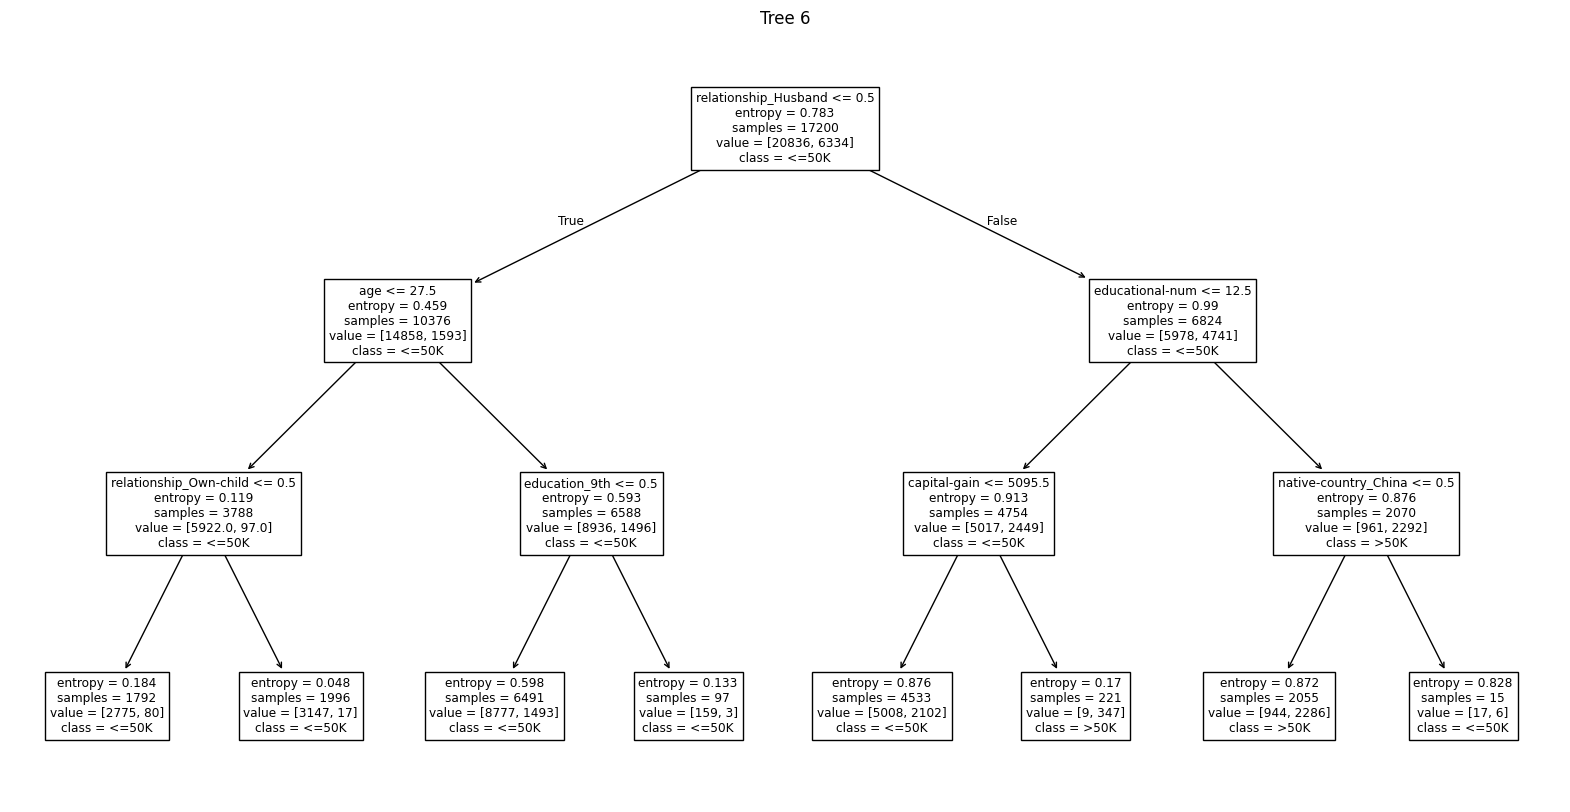

In [ ]:
a=clf.best_estimator_
for i in range(6):
    plt.figure(figsize=(20, 10))
    plot_tree(a.estimators_[i],feature_names=xTrain.columns,class_names=['<=50K', '>50K'])
    plt.title(f'Tree {i+1}')
    plt.show()

## 9.	ความแม่นยำ (accuracy) ของโมเดล random forest บนชุดข้อมูลทดสอบ 

In [84]:
result=clf.score(xTest,yTest)
print("accuracy: {:.2f}%".format(result*100))

accuracy: 81.17%


## ข้อ 10. ปรับปรุงโมเดล random forest จากข้อ 7 โดยใช้อัลกอริทึม XgBoost พร้อมแสดงค่าความแม่นยำบนชุดข้อมูลทดสอบ (test data) 

In [91]:
import xgboost as xgb
xgbModel=xgb.XGBClassifier(objective="multi:softmax",n_estimators=10,max_depth=5,num_class=2)
xgbModel.fit(xTrain,yTrain)
result=xgbModel.score(xTest,yTest)
print("accuracy: {:.2f}%".format(result*100))

accuracy: 86.43%


## ข้อ 11. ทดลองใช้ GridSearchCV เพื่อหาจำนวนต้นไม้ย่อยใน XgBoost ที่ให้ผลลัพธ์สูงที่สุด จากการกำหนดค่าความลึกตั้งแต่ 2 ถึง 4 ระดับ และจำนวนต้นไม้ย่อยตั้งแต่  1 ถึง 20 ต้น 

In [93]:
para={'n_estimators': list(range(1,21)),'max_depth': list(range(2,5))}
xgbModel=xgb.XGBClassifier(objective="multi:softmax",num_class=2)
xgbModel=GridSearchCV(xgbModel,para)
xgbModel.fit(xTrain,yTrain)
xgbModel.best_params_

{'max_depth': 4, 'n_estimators': 20}

## ข้อ 12.	บันทึกโมเดล XGboost ในรูปแบบของไฟล์ pickle ตั้งชื่อ XgB.pkl.

In [94]:
import pickle
pickle.dump(xgbModel,open("XgB.pkl",'wb'))